@author: Carson Hanel
Note: These code snippets are derived from Data Science from Scratch First Principles by Joel Grus.
      For right now, I'll be transferring the code from the book, explaining the functions, and creating
      an API that can be utilized in further analysis. While some of these functions may be part of 
      the Python standard library or a package already created, I thought it would be useful to begin
      creating my own data science toolbelt for the future, with self written commentary.
      
Header:

In [72]:
import random
import math
import matplotlib.pyplot as plt
from collections import Counter

Uniform Probabiliy Density Function:

In [18]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

Uniform Cumulative Distribution Function:

In [19]:
def uniform_cdf(x):
    if x < 0:   return 0
    elif x < 1: return x
    else:       return 1

Normal Probability Density Function:

In [20]:
def normal_pdf(x, mu = 0, sigma = 1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

In [ ]:
Normal Cumulative Distribution Function:

In [21]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

Inverse Normal Cumulative Function:
    Essentially a binary search looking for the correct ICDF given the tolerance.

In [22]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
            
    low_z, low_p = -10.0, 0
    hi_z,  hi_p  =  10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
                        
    return mid_z

Singular Bernoulli Trial:

In [23]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

Binomial trial: Essentially, a set of n bernoulli random variables tried against threshold p

In [24]:
def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

Histogram Creation Function:

In [67]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
            
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
             0.8,
             color='0.75')
            
    mu    = p * n 
    sigma = math.sqrt(n * p * (1 - p))
            
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

Given experiment from the textbook, making example of random variables:
(For some reason random.choice was giving boy/boy every trial. Will fix.)

In [56]:
def random_kid():
    genders = ["boy", "girl"]
    return random.choice(genders)

both_girls  = 0
older_girl  = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older   = random_kid()
    if older == "girl":
        older_girl  += 1
    if older == "girl" and younger == "girl":
        both_girls  += 1
    if older == "girl" or  younger == "girl":
        either_girl += 1
        
print "P(both | older):", both_girls / older_girl
print "P(both | either):", both_girls / either_girl

P(both | older): 0
P(both | either): 0


Examples of Normal Probability Density Functions:    

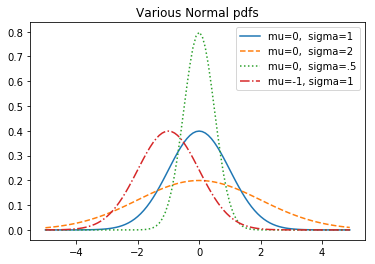

In [63]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1)   for x in xs], '-' , label = 'mu=0,  sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2)   for x in xs], '--', label = 'mu=0,  sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':' , label = 'mu=0,  sigma=.5')
plt.plot(xs, [normal_pdf(x, mu=-1)     for x in xs], '-.', label = 'mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

Examples of Normal Cumulative Distribution Functions: 

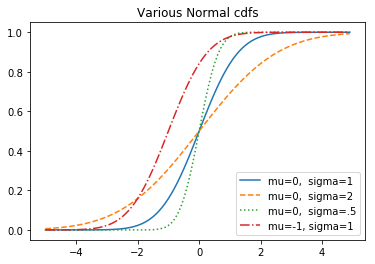

In [65]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1)   for x in xs], '-' , label = 'mu=0,  sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2)   for x in xs], '--', label = 'mu=0,  sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':' , label = 'mu=0,  sigma=.5')
plt.plot(xs, [normal_cdf(x, mu=-1)     for x in xs], '-.', label = 'mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

Finally:

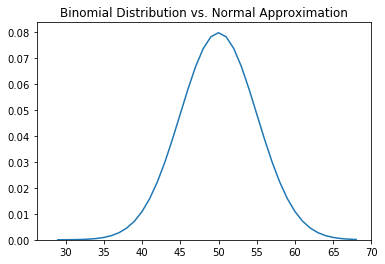

In [74]:
make_hist(0.5, 100, 10000)